Business Formation Analysis First EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("data/bfs_monthly.csv")

df.head()


,sa,naics_sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,U,TOTAL,BA_BA,US,2025,497030,440230,497911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U,NAICS11,BA_BA,US,2025,5141,4258,4398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U,NAICS21,BA_BA,US,2025,547,472,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,U,NAICS22,BA_BA,US,2025,689,663,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,U,NAICS23,BA_BA,US,2025,49525,44621,47136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_long = df.melt(
    id_vars=["sa", "naics_sector", "series", "geo", "year"],
    value_vars=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    var_name="month",
    value_name="value"
)

# 3. Convert 'month' to number format (e.g., jan -> 1, feb -> 2, etc.)
month_map = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4,
    "may": 5, "jun": 6, "jul": 7, "aug": 8,
    "sep": 9, "oct": 10, "nov": 11, "dec": 12
}
df_long["month"] = df_long["month"].str.lower().map(month_map)

# 4. Create a proper datetime column
df_long["year_month"] = pd.to_datetime(df_long["year"].astype(str) + "-" + df_long["month"].astype(str))

# 5. Check it out
df_long.head()

,sa,naics_sector,series,geo,year,month,value,year_month
0,U,TOTAL,BA_BA,US,2025,1,497030,2025-01-01
1,U,NAICS11,BA_BA,US,2025,1,5141,2025-01-01
2,U,NAICS21,BA_BA,US,2025,1,547,2025-01-01
3,U,NAICS22,BA_BA,US,2025,1,689,2025-01-01
4,U,NAICS23,BA_BA,US,2025,1,49525,2025-01-01


In [4]:
df_long.info()
df_long.describe()
df_long.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416784 entries, 0 to 416783
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   sa            416784 non-null  object        
 1   naics_sector  416784 non-null  object        
 2   series        416784 non-null  object        
 3   geo           416784 non-null  object        
 4   year          416784 non-null  int64         
 5   month         416784 non-null  int64         
 6   value         395808 non-null  object        
 7   year_month    416784 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 25.4+ MB


sa                  0
naics_sector        0
series              0
geo                 0
year                0
month               0
value           20976
year_month          0
dtype: int64

In [5]:
# # Check for missing values
# df.isnull().sum()

# # Drop or fill missing values
# df = df.dropna()  # or use df.fillna(method='ffill'), depending on context

# # Convert date columns if necessary
# df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))


In [6]:
df_long = df_long.dropna(subset=["value"])


In [7]:
print(df_long["series"].unique())        # e.g., BA_BA, BA_HR, BF_BF4Q, etc.
print(df_long["naics_sector"].unique())  # e.g., TOTAL, NAICS11 (agriculture), etc.
print(df_long["geo"].unique())           # e.g., US or state codes


['BA_BA' 'BA_CBA' 'BA_HBA' 'BA_WBA' 'BF_PBF4Q' 'BF_PBF8Q' 'BF_SBF4Q'
 'BF_SBF8Q' 'BF_BF4Q' 'BF_DUR4Q' 'BF_BF8Q' 'BF_DUR8Q']
['TOTAL' 'NAICS11' 'NAICS21' 'NAICS22' 'NAICS23' 'NAICSMNF' 'NAICS42'
 'NAICSRET' 'NAICSTW' 'NAICS51' 'NAICS52' 'NAICS53' 'NAICS54' 'NAICS55'
 'NAICS56' 'NAICS61' 'NAICS62' 'NAICS71' 'NAICS72' 'NAICS81' 'NONAICS']
['US' 'NO' 'MW' 'SO' 'WE' 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC'
 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI'
 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK'
 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


In [8]:
df_filtered = df_long[
    (df_long["series"] == "BA_BA") &
    (df_long["naics_sector"] == "TOTAL") &
    (df_long["geo"] == "US")
]


/tmp/ipykernel_2475/1991599150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['value_smoothed'] = df_filtered['value'].rolling(window=3).mean()
/tmp/ipykernel_2475/1991599150.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


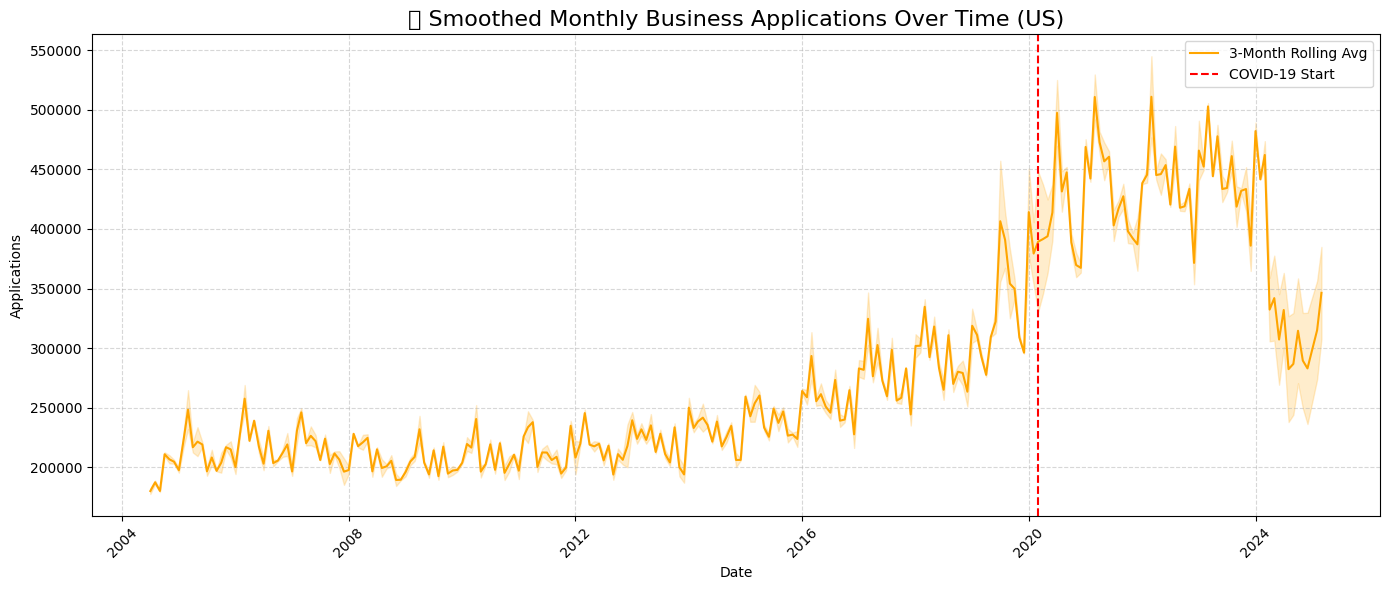

In [9]:
df_filtered['value_smoothed'] = df_filtered['value'].rolling(window=3).mean()

plt.figure(figsize=(14,6))
sns.lineplot(data=df_filtered, x="year_month", y="value_smoothed", label="3-Month Rolling Avg", color="orange")

plt.title("📈 Smoothed Monthly Business Applications Over Time (US)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Applications")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.axvline(pd.to_datetime("2020-03-01"), color='red', linestyle='--', label='COVID-19 Start')
plt.legend()

plt.show()


### 📊 Trend Analysis: Business Applications Over Time (2004–2025)

- From 2004 to 2015, business applications in the US remained relatively stable (~200k/month).
- A noticeable upward trend began around 2016, possibly due to improving economic conditions or tech accessibility.
- A significant surge occurred in 2020–2021, coinciding with the COVID-19 pandemic, likely due to job loss, digital shift, and increased interest in entrepreneurship.
- Applications have declined since the 2021 peak but remain above pre-pandemic levels, suggesting a potential long-term shift in the entrepreneurial landscape.

📌 Next Steps:
- Explore trends by sector (`naics_sector`) or region (`geo`)
- Analyze business **formations** vs. **applications**
- Identify seasonality patterns if zooming into month-level again


In [10]:
df_filtered.rename(columns={'value': 'applications'}, inplace=True)
print(df_filtered)


       sa naics_sector series geo  year  month applications year_month  \
0       U        TOTAL  BA_BA  US  2025      1       497030 2025-01-01   
21      A        TOTAL  BA_BA  US  2025      1       393232 2025-01-01   
1216    U        TOTAL  BA_BA  US  2024      1       577568 2024-01-01   
1237    A        TOTAL  BA_BA  US  2024      1       453575 2024-01-01   
2432    U        TOTAL  BA_BA  US  2023      1       441031 2023-01-01   
...    ..          ...    ...  ..   ...    ...          ...        ...   
411789  A        TOTAL  BA_BA  US  2006     12       247474 2006-12-01   
413440  U        TOTAL  BA_BA  US  2005     12       183942 2005-12-01   
413461  A        TOTAL  BA_BA  US  2005     12       234221 2005-12-01   
415112  U        TOTAL  BA_BA  US  2004     12       190986 2004-12-01   
415133  A        TOTAL  BA_BA  US  2004     12       193836 2004-12-01   

        value_smoothed  
0                  NaN  
21                 NaN  
1216     489276.666667  
1237     47

/tmp/ipykernel_2475/2039081839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'value': 'applications'}, inplace=True)


In [11]:
# Ensure 'applications' is numeric
df_filtered['applications'] = pd.to_numeric(df_filtered['applications'], errors='coerce')


/tmp/ipykernel_2475/1694115699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['applications'] = pd.to_numeric(df_filtered['applications'], errors='coerce')


/tmp/ipykernel_2475/804563054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'value': 'applications'}, inplace=True)
/tmp/ipykernel_2475/804563054.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


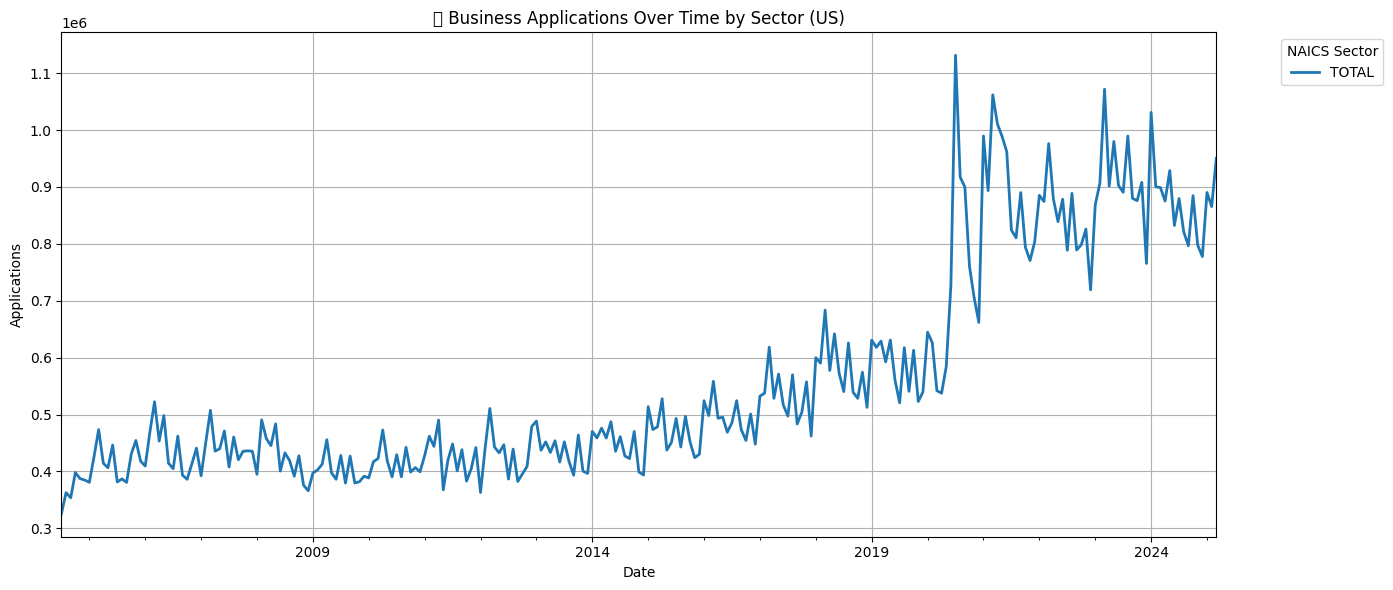

In [12]:
df_filtered.rename(columns={'value': 'applications'}, inplace=True)
df_us = df_filtered[df_filtered['geo'] == 'US']
# Group applications by sector and year_month
sector_trends = df_us.groupby(['naics_sector', 'year_month'])['applications'].sum().reset_index()

# Pivot to reshape for plotting
pivot_sector = sector_trends.pivot(index='year_month', columns='naics_sector', values='applications')

# Plot
pivot_sector.plot(figsize=(14, 6), linewidth=2)
plt.title('📊 Business Applications Over Time by Sector (US)')
plt.ylabel('Applications')
plt.xlabel('Date')
plt.legend(title='NAICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




/tmp/ipykernel_2475/2720897096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['year_month'].dt.month_name()


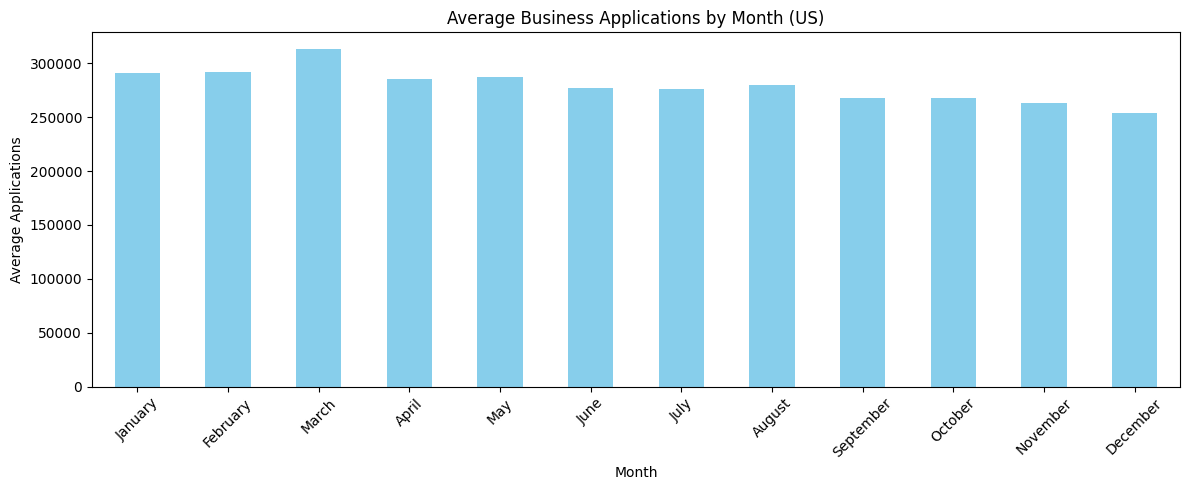

In [13]:
# Extract month name
df_filtered['month'] = df_filtered['year_month'].dt.month_name()

# Calculate monthly averages for US data
monthly_avg = df_filtered[df_filtered['geo'] == 'US'].groupby('month')['applications'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot
plt.figure(figsize=(12, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Business Applications by Month (US)')
plt.ylabel('Average Applications')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


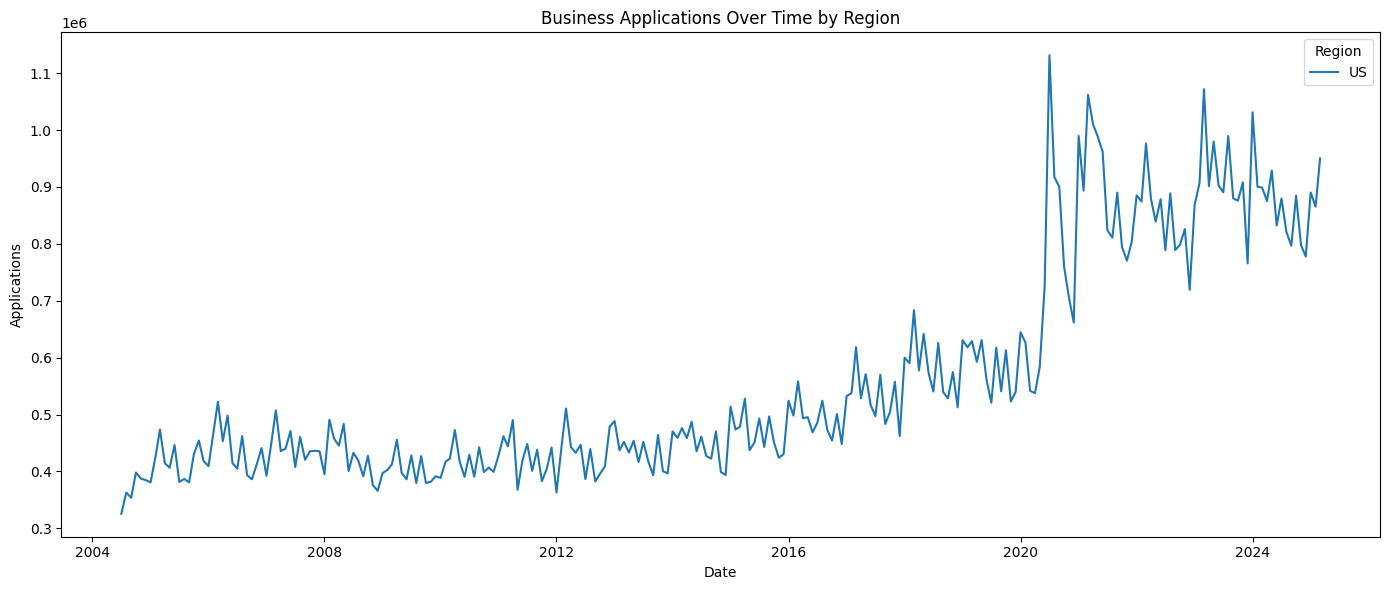

In [14]:
# Top 5 regions with highest total applications
top_regions = df_filtered.groupby('geo')['applications'].sum().nlargest(5).index

# Filter and plot
df_top_geo = df_filtered[df_filtered['geo'].isin(top_regions)]
region_trends = df_top_geo.groupby(['geo', 'year_month'])['applications'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=region_trends, x='year_month', y='applications', hue='geo')
plt.title('Business Applications Over Time by Region')
plt.ylabel('Applications')
plt.xlabel('Date')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


In [27]:
# Ensure datetime format safely
df_filtered = df_filtered.copy()
df_filtered['year_month'] = pd.to_datetime(df_filtered['year_month'])

# Separate series
df_ba = df_filtered[(df_filtered['series'] == 'BA_BA') & (df_filtered['geo'] == 'US')]
df_bf = df_filtered[(df_filtered['series'] == 'BA_BF4Q') & (df_filtered['geo'] == 'US')]

# Check unique time values
print("BA_BA months:", df_ba['year_month'].dt.to_period("M").unique())
print("BA_BF4Q months:", df_bf['year_month'].dt.to_period("M").unique())


BA_BA months: <PeriodArray>
['2025-01', '2024-01', '2023-01', '2022-01', '2021-01', '2020-01', '2019-01',
 '2018-01', '2017-01', '2016-01',
 ...
 '2013-12', '2012-12', '2011-12', '2010-12', '2009-12', '2008-12', '2007-12',
 '2006-12', '2005-12', '2004-12']
Length: 249, dtype: period[M]
BA_BF4Q months: <PeriodArray>
[]
Length: 0, dtype: period[M]
